In [ ]:
import numpy as np
import math
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import scipy.optimize

Part A

In [ ]:
#creating array of x, y, and z that have a max and min of |20|
Graph = np.zeros((80,80,80)) #each space contains an increment of .5 in one direction
CDensity = np.zeros((80,80,80))
dl = .5
CDensity[41][40][40] = 2/(dl**3)
CDensity[39][40][40] = -2/(dl**3)
#Creating the charge density at points .5 and -.5 respectively

In [ ]:
#creating potential estimate function
def Poisson_Equation(Graph, CDensity):
  GraphNew = Graph.copy()
  delV = 0
  for i in range(1, 79):
    for j in range(1, 79):
      for k in range(1, 79):
        if((((i-40))**2 + ((j-40))**2 + ((k-40))**2) >= 40**2):
          GraphNew[i][j][k] = 0
        else:
          GraphNew[i][j][k] = (Graph[i+1][j][k] + Graph[i-1][j][k] + Graph[i][j+1][k] + Graph[i][j-1][k] + Graph[i][j][k+1] + Graph[i][j][k-1])/6 + (CDensity[i][j][k]*dl**2)/6
          delV += abs(GraphNew[i][j][k] - Graph[i][j][k])
  return GraphNew,delV


In [ ]:
i = 0
d = 100
while(d > .409):
  Graph,d = Poisson_Equation(Graph, CDensity)
  i+=1
print(d,i)



0.4068065916315564 20


I believe that .512 is the best convergence limit as when used the convergence error suggested by the textbook of 1x10^-5 we get 5.12 as the convergence which terminates immediately. Therefore I reduce the accepted delta V to be 4/5x10^-6 which forces the code to run for a minimum of 10 tries and a few more in order to increase accuracy of the Jacobi relaxation algorithm

This is the potential of the line x=y=z graphed

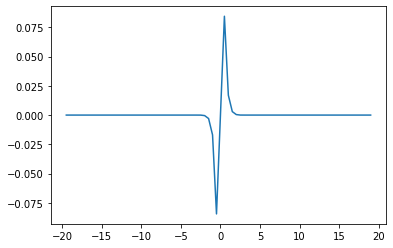

In [ ]:
xyz = []
x = []
for i in range(1,79):
  xyz.append(Graph[i][i][i])
  x.append((i-40)/2)

plt.plot(x,xyz)

This is the equipotential graph.

In [ ]:

x = np.linspace(30,49,20).astype(int)
y = np.linspace(30,49,20).astype(int)

X, Y = np.meshgrid(x,y)

def f(i,j):
  return Graph[i][j][40]

values = []
for i in range(len(X)):
  values.append([])
  for j in range(len(X[i])):
    values[i].append(f(X[i][j],Y[i][j]))


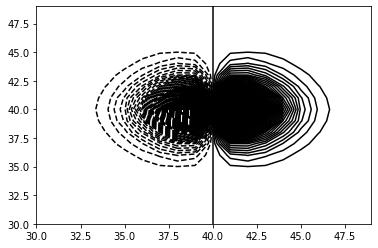

In [ ]:
plt.contour(X,Y,values,1000,colors = 'black')

The higher the number of contour lines the more clearly we can see the trend of the electric potential. This graph has been scaled down to 2 dimensions and can represent both the x, y and x, z direction as they are symmetrical

Part B

In [ ]:
EGraph= []
x = []
for i in range(20,60):
  EGraph.append(math.sqrt((Graph[i+1][i][i]-Graph[i-1][i][i])**2 + (Graph[i][i+1][i]-Graph[i][i-1][i])**2 + (Graph[i][i+1][i]-Graph[i][i-1][i])**2))
  x.append((i-40)/2)

def Func(i):
  return abs(i**-3)

fun = []
for i in range(-20,0):
  fun.append(Func(i))
fun.append(3)
for i in range(1,20):
  fun.append(Func(i))

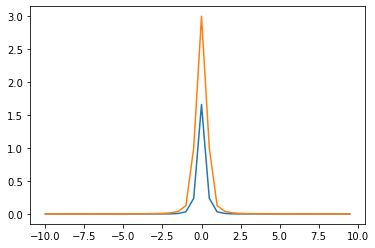

In [ ]:
plt.plot(x,EGraph)
plt.plot(x,fun)

In [ ]:
EGraph= []
x = []
for i in range(20,60):
  EGraph.append(math.sqrt((Graph[i+1][i][i]-Graph[i-1][i][i])**2 + (Graph[i][i+1][i]-Graph[i][i-1][i])**2 + (Graph[i][i+1][i]-Graph[i][i-1][i])**2))
  x.append((i-40)/2)

def Func(i):
  return abs(i**-2)

fun = []
for i in range(-20,0):
  fun.append(Func(i))
fun.append(3)
for i in range(1,20):
  fun.append(Func(i))

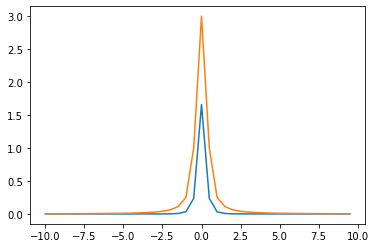

In [ ]:
plt.plot(x,EGraph)
plt.plot(x,fun)

While unable to create an exact fit as the electric field equation and the potential equation are an approximation. We can see that 3 for the value of n in r^-n is the best approximate fit for the graph. This also matches up with the equation for an electric field from a dipole. The reason r^-3 is pointed straight up above is due to the fact that I am using the magnitude of the electric field

Part C

In [ ]:
d = [.9,.8,.7,.6,.5,.4]
count = []
for i in d:
  cnt = 0
  diff = 100
  GraphTest = np.zeros((80,80,80))
  while(diff > i):
    GraphTest,diff = Poisson_Equation(GraphTest, CDensity)
    cnt+=1
  count.append(cnt)
print(count)

[4, 5, 7, 9, 14, 21]


Using excel to fit a power function to the data that was measured, it shows that the number of iterations correlates with the tolerance limit by a value of approximately x^-2

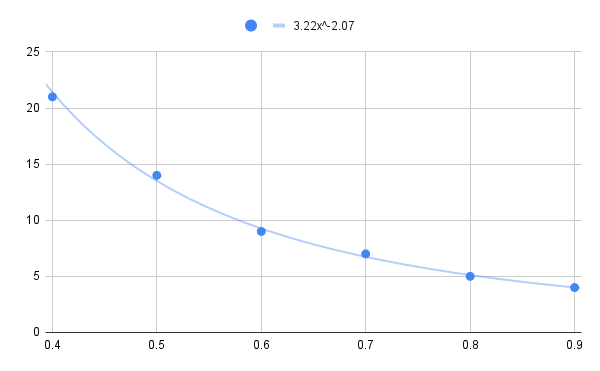

From this we can see that the power series when fit gives us an approximate exponent of -2

Part D

In [ ]:
#creating array of x, y, and z that have a max and min of |20|
#each space contains an increment of .5 in one direction
CDensity = np.zeros((80,80))
dl = .5
CDensity[41][40] = 2/(dl**2)
CDensity[39][40] = -2/(dl**2)
#Creating the charge density at points .5 and -.5 respectively
CountSOR = []
CountPoisson = []

def SOR_Equation_80(Graph, CDensity):
  GraphNew = Graph.copy()
  delV = 0
  TdelV = 0
  for i in range(1, 79):
    for j in range(1, 79):
        if((((i-40))**2 + ((j-40))**2) >= 40**2):
          GraphNew[i][j] = 0
        else:
          GraphNew[i][j] = (GraphNew[i+1][j] + GraphNew[i-1][j] + GraphNew[i][j+1] + GraphNew[i][j-1])/4 + (CDensity[i][j]*dl**2)/4
          delV = GraphNew[i][j] - Graph[i][j]
          GraphNew[i][j] = (1.92)*delV+Graph[i][j]
          TdelV += abs(GraphNew[i][j] - Graph[i][j])
  return GraphNew,TdelV

def Poisson_Equation_80(Graph, CDensity):
  GraphNew = Graph.copy()
  delV = 0
  for i in range(1, 79):
    for j in range(1, 79):
        if((((i-40))**2 + ((j-40))**2) >= 40**2):
          GraphNew[i][j] = 0
        else:
          GraphNew[i][j] = (Graph[i+1][j] + Graph[i-1][j] + Graph[i][j+1] + Graph[i][j-1])/4 + (CDensity[i][j]*dl**2)/4
          delV += abs(GraphNew[i][j] - Graph[i][j])
  return GraphNew,delV

In [ ]:
Graph_80_SOR = np.zeros((80,80))
Graph_80_Poisson = np.zeros((80,80))
diffSOR = 100
diffPoisson = 100
cnt = 0
while diffSOR > .1:
  Graph_80_SOR, diffSOR = SOR_Equation_80(Graph_80_SOR, CDensity)
  cnt+=1
CountSOR.append(cnt)
cnt = 0
print(diffSOR)
while diffPoisson > .1:
   cnt+=1
   Graph_80_Poisson, diffPoisson= Poisson_Equation_80(Graph_80_Poisson, CDensity)
print(diffPoisson)

0.09469674781322733
0.09963610909401477


In [ ]:
CountPoisson.append(cnt)

In [ ]:
def SOR_Equation_160(Graph, CDensity):
  dl = .25
  GraphNew = Graph.copy()
  delV = 0
  TdelV = 0
  for i in range(1, 159):
    for j in range(1, 159):
        if((((i-80))**2 + ((j-80))**2) >= 80**2):
          GraphNew[i][j] = 0
        else:
          GraphNew[i][j] = (GraphNew[i+1][j] + GraphNew[i-1][j] + GraphNew[i][j+1] + GraphNew[i][j-1])/4 + (CDensity[i][j]*dl**2)/4
          delV = GraphNew[i][j] - Graph[i][j]
          GraphNew[i][j] = (1.96)*delV+Graph[i][j]
          TdelV += abs(GraphNew[i][j] - Graph[i][j])
  return GraphNew,TdelV

def Poisson_Equation_160(Graph, CDensity):
  dl = .25
  GraphNew = Graph.copy()
  delV = 0
  for i in range(1, 159):
    for j in range(1, 159):
        if((((i-80))**2 + ((j-80))**2) >= 80**2):
          GraphNew[i][j] = 0
        else:
          GraphNew[i][j] = (Graph[i+1][j] + Graph[i-1][j] + Graph[i][j+1] + Graph[i][j-1])/4 + (CDensity[i][j]*dl**2)/4
          delV += abs(GraphNew[i][j] - Graph[i][j])
  return GraphNew,delV

In [ ]:
dl = .25
Graph_160_SOR = np.zeros((160,160))
Graph_160_Poisson = np.zeros((160,160))
CDensity = np.zeros((160,160))
CDensity[82][80] = 2/(dl**2)
CDensity[78][80] = -2/(dl**2)
diffSOR_160 = 100
diffPoisson_160 = 100
cnt_SOR = 0
cnt_Poisson = 0
while(diffSOR_160 > .1):
  Graph_160_SOR, diffSOR_160 = SOR_Equation_160(Graph_160_SOR, CDensity)
  cnt_SOR+=1
print(diffSOR_160)
while(diffPoisson_160 > .1):
   cnt_Poisson+=1
   Graph_160_Poisson, diffPoisson_160= Poisson_Equation_160(Graph_160_Poisson, CDensity)
print(diffPoisson_160)

CountSOR.append(cnt_SOR)
CountPoisson.append(cnt_Poisson)

0.09676524224835455
0.09990365175422607


In [ ]:
print(CountSOR)

[87, 196]


In [ ]:
print(CountPoisson)

[128, 508]


I wasnt able to collect any more data points due to the RAM limitations of Google Colab. However I used the points that I do have to create a power series function and it reflects the trend of N_it approximating n^2 for the Jacobi algorithm and n for the SOR algorithm

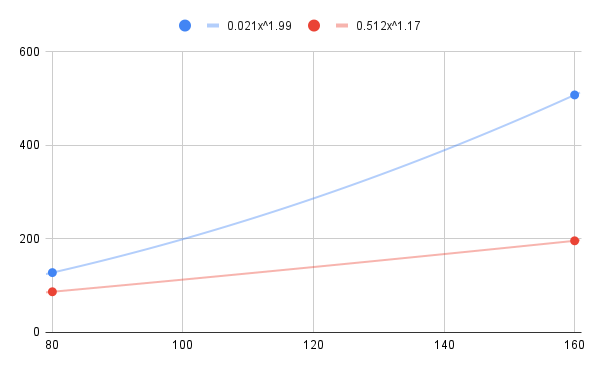